# Ver dps
[lung cancer](https://www.kaggle.com/code/saychakra/survival-analysis-of-lung-cancer-patients)<br>
[south korea](https://www.kaggle.com/code/rafaelvalerof/survival-anahttps://lysis-for-south-korea) <br>
[survival analysis](https://www.kaggle.com/code/tsheposono/survival-analysis-using-kaplan-meier-weibull)<br>
[s.a. ex](https://www.kaggle.com/code/aysuncag/survival-analysis-basics-and-ex-1-2)<br>
[customer churn](https://www.kaggle.com/code/brunods10/predicting-customer-churn-with-survival-analysis)<br>
[EDA](https://www.kaggle.com/code/rikdifos/eda-vintage-analysis)

# Importações

## Bibliotecas

In [1]:
import pandas as pd, numpy as np, seaborn as sns
import matplotlib.pyplot as plt
from pprint import pprint, PrettyPrinter
# from IPython.display import display, Latex

In [2]:
# survival libraries
# !pip install lifelines/
from lifelines import CoxPHFitter
from lifelines.statistics import logrank_test
from lifelines.statistics import multivariate_logrank_test
from lifelines.datasets import load_lung

from scipy.stats import logistic

In [3]:
# !pip install fitter
from fitter import Fitter
from fitter import get_common_distributions, get_distributions

## Funções

In [188]:
class Survival():
    def __init__(self, df, event: str, time: str):
        '''
        This class creates a survival object, with censoring and time as its columns.
        '''
        self.df = df
        self.event = self.df[event]
        self.eventname = event
        self.time = self.df[time]
        self.attr = {}
        self.cols = [i for i in self.df.columns]
    
    def get_event(self):
        col = self.eventname
        event_dic = pd.DataFrame(
            {"censoring": ["censoring", "death"],
            "delta": [0,1],
            "quantity": self.count_attr(self.eventname)}
        )
        return pd.DataFrame(event_dic).set_index("delta")

    def set_ages(self, col, by_interval: list=None):
        '''
        Set group of ages as attr. by_interval is a list of tuples
        '''
        if by_interval != None:
            age = {
                "group": list(range(len(by_interval))),
                "age" : [],
                "quantity": self.count_attr(col)
                }
            for i, interv in enumerate(intervals):
                interv_ = pd.Interval(interv[0], interv[1], closed="left")
                age["age"].append(interv_)
            
            self.attr["age"] = age
            return pd.DataFrame(age).dropna()
    
    def count_attr(self, col):
        return self.df[col].value_counts().sort_index()

    def set_attr(self, col, attr: list=None, code: dict=None):
        new_attr = {
            "code": None,
            col: None,
            "quantity": self.count_attr(col)
        }
        if code != None:
            new_attr["code"] = code
            new_attr[col] = attr
    
        self.attr[col] = new_attr
        return 
    
    def get_attr(self, col):
        return pd.DataFrame(self.attr[col]).dropna()


    def surv_group(self, model, col):
        groups = self.df[col].unique()

        for i, group in enumerate(groups):
            ax = plt.subplot()
            ix = self.df[col] == group
            model.fit(self.time[ix], self.event[ix], label=group)
            model.plot_survival_function(ax=ax, legend=True,
                at_risk_counts=True)
        plt.title(col)
        return

In [66]:
def check_duplicated_lines(df):
    """
    This functions checks if there are duplicate lines.
    If yes, it shows the count of the duplicated.
    """
    confirmation = df.duplicated().values.any()
    if confirmation:
        print(f"There's {df.duplicated().sum()} duplicated lines.")
    else:
        print("There's no duplicated lines.")

def check_nulls(df):
    nulls = pd.DataFrame(data={
      'total nulls': df.isnull().sum(),
      'percentage nulls': df.isnull().sum()/df.shape[0]
        })
    
    return nulls

In [67]:
def multifig(col=3, row=3, sharex=True, sharey=True,
    figsize=(20,15)):
    fig, axs = plt.subplots(
                      ncols=col, nrows=row,
                      figsize=figsize, 
                      sharex=sharex, 
                      sharey=sharey,
                      constrained_layout = True
                      )
    
    return fig, axs
    

def multifig_univar(df, col, row, sharey=False, sharex=False):
    _, axs = multifig(col=col, row=row, sharey=False, sharex=False)
    columns = [i for i in df.columns]
    
    c = 0
    for i in range(row):
        for j in range(col):
            column = columns[c]
            data = df[column]
            sns.histplot(data, ax=axs[i, j]).set_title(column)
            c += 1
    return

In [7]:
def corr_df(df):
    # Compute the correlation matrix
    corr = df.corr()

    # Generate a mask for the upper triangle
    mask = np.triu(np.ones_like(corr, dtype=bool))

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(11, 9))

    # # Generate a custom diverging colormap
    cmap = sns.diverging_palette(230, 20, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask=mask, vmax=.3, center=0, cmap=cmap,
                square=True, linewidths=.5, cbar_kws={"shrink": .5},
                annot=True)
    return

In [216]:
def statistics_per_group(kmf1, kmf2):
  median_ = kmf1.median_survival_time_

  median2_ = kmf2.median_survival_time_

  print(f'Tempo de Vida Mediano 1: {median_}')
  print()

  print(f'Tempo de Vida Mediano 2: {median2_}')

  print()
  print('Probabilidade de sobrevivência após 600 dias')
  print('1:', kmf1.predict(600))
  print('2:', kmf2.predict(600))

In [223]:
def group_karno(score):
  if score >= 80.:
    return 'bem'
  elif score >= 40.:
    return 'mal'
  elif score < 80 and karno > 40:
    return 'medio'

## Dados

In [189]:
#Leitura dos dados
df_lung = load_lung()

# Manipulação dos dados

In [190]:
check_nulls(df_lung)

,total nulls,percentage nulls
inst,1,0.004386
time,0,0.000000
status,0,0.000000
age,0,0.000000
sex,0,0.000000
ph.ecog,1,0.004386
ph.karno,1,0.004386
pat.karno,3,0.013158
meal.cal,47,0.206140
wt.loss,14,0.061404


In [191]:
check_duplicated_lines(df_lung)

There's no duplicated lines.


In [192]:
#Tabela descritiva das variáveis
round(df_lung.describe())

,inst,time,status,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss
count,227.0,228.0,228.0,228.0,228.0,227.0,227.0,225.0,181.0,214.0
mean,11.0,305.0,1.0,62.0,1.0,1.0,82.0,80.0,929.0,10.0
std,8.0,211.0,0.0,9.0,0.0,1.0,12.0,15.0,402.0,13.0
min,1.0,5.0,0.0,39.0,1.0,0.0,50.0,30.0,96.0,-24.0
25%,3.0,167.0,0.0,56.0,1.0,0.0,75.0,70.0,635.0,0.0
50%,11.0,256.0,1.0,63.0,1.0,1.0,80.0,80.0,975.0,7.0
75%,16.0,396.0,1.0,69.0,2.0,1.0,90.0,90.0,1150.0,16.0
max,33.0,1022.0,1.0,82.0,2.0,3.0,100.0,100.0,2600.0,68.0


In [193]:
#Tamanho do dataset e número de amostras coletadas
df_lung.shape

(228, 10)

In [194]:
df_lung.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228 entries, 0 to 227
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   inst       227 non-null    float64
 1   time       228 non-null    int64  
 2   status     228 non-null    int64  
 3   age        228 non-null    int64  
 4   sex        228 non-null    int64  
 5   ph.ecog    227 non-null    float64
 6   ph.karno   227 non-null    float64
 7   pat.karno  225 non-null    float64
 8   meal.cal   181 non-null    float64
 9   wt.loss    214 non-null    float64
dtypes: float64(6), int64(4)
memory usage: 17.9 KB


In [195]:
# Manipulação dos dados
df_lung.fillna(df_lung.mean(), inplace=True)
for col in ['sex', 'ph.ecog']:
    df_lung[col] = df_lung[col].astype('category')



In [196]:
check_nulls(df_lung).any()

total nulls         False
percentage nulls    False
dtype: bool

In [197]:
survival = Survival(df_lung, event="status", time="time")

In [185]:
survival.get_event()

,censoring,quantity
delta,,
0,censoring,63
1,death,165


# Análise Exploratória

## Univariada

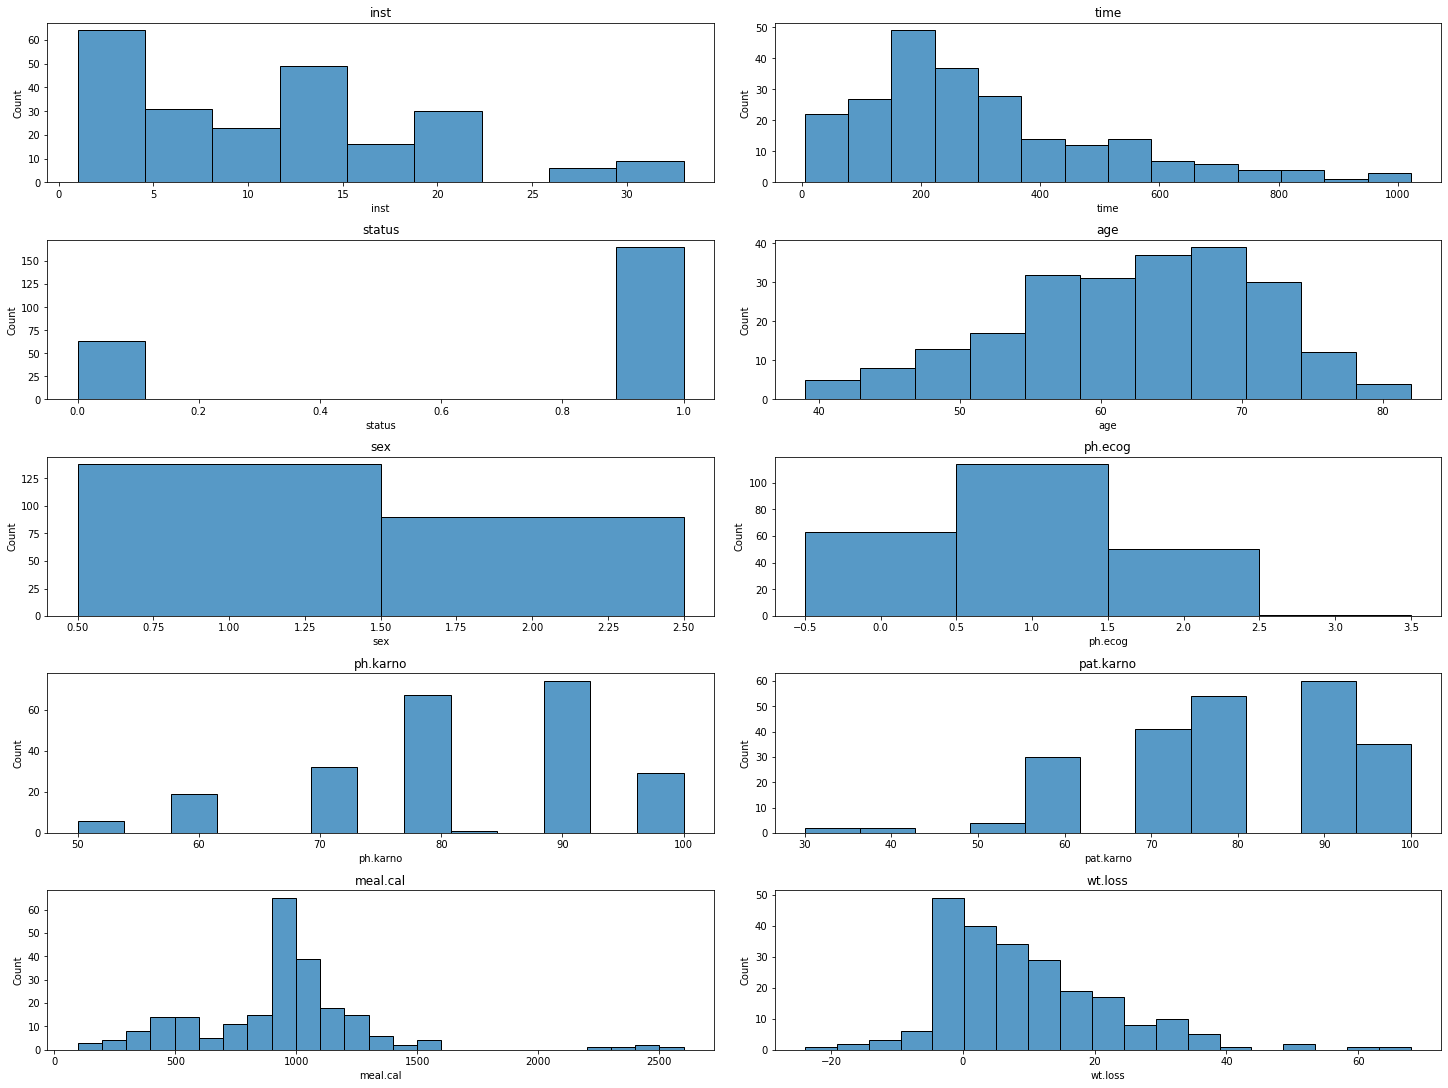

In [52]:
multifig_univar(df_lung, col=2, row=5)

/home/aime/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimension

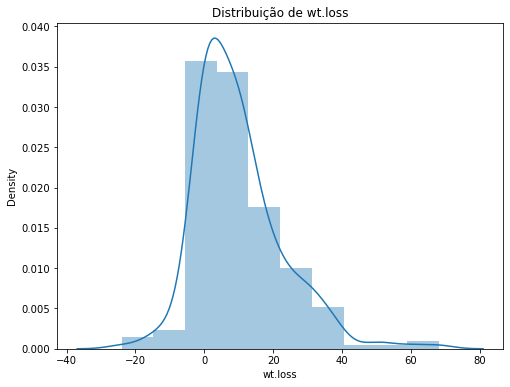

In [19]:
#Histograma de Faixa etária
f, ax = plt.subplots(figsize=(8,6))
x = df_lung['wt.loss']
ax = sns.distplot(x, bins=10)
plt.title("Distribuição de wt.loss")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


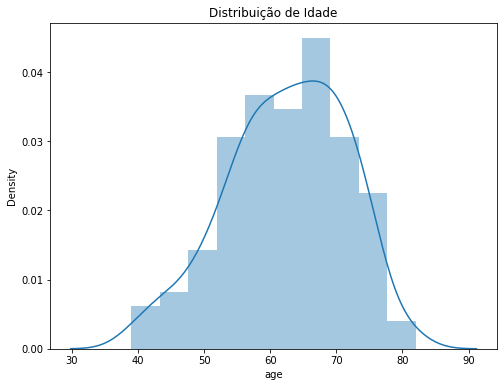

In [ ]:
import matplotlib.pyplot as plt

#Histograma de Faixa etária
f, ax = plt.subplots(figsize=(8,6))
x = df_lung['age']
ax = sns.distplot(x, bins=10)
plt.title("Distribuição de Idade")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 1.0, 'Distribuição Idade')]

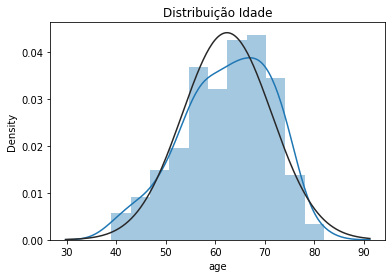

In [ ]:
from scipy.stats import norm

sns.distplot(df_lung['age'],
             fit=norm).set(
    title='Distribuição Idade')

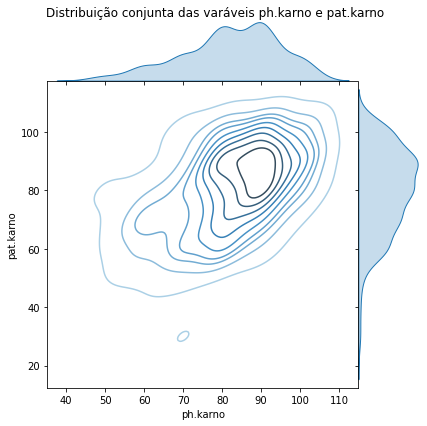

In [ ]:
g = sns.JointGrid(x="ph.karno", y="pat.karno", data=df_lung, space=0)
g = g.plot_joint(sns.kdeplot, cmap="Blues_d")
g = g.plot_marginals(sns.kdeplot, shade=True)

g.fig.suptitle('Distribuição conjunta das varáveis ph.karno e pat.karno')
g.fig.subplots_adjust(top=0.95)



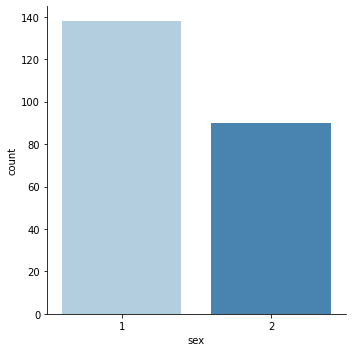

In [ ]:
sns.catplot(x="sex", kind="count", palette='Blues', data=df_lung)
ax.set_xticklabels(['Male, Female'])

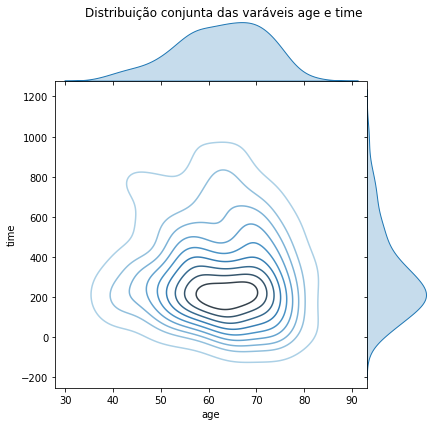

In [ ]:
g = sns.JointGrid(x="age", y="time", data=df_lung, space=0)
g = g.plot_joint(sns.kdeplot, cmap="Blues_d")
g = g.plot_marginals(sns.kdeplot, shade=True)
# plt.title('Distribuição conjunta das varáveis age e time')

g.fig.suptitle('Distribuição conjunta das varáveis age e time')
g.fig.subplots_adjust(top=0.95)

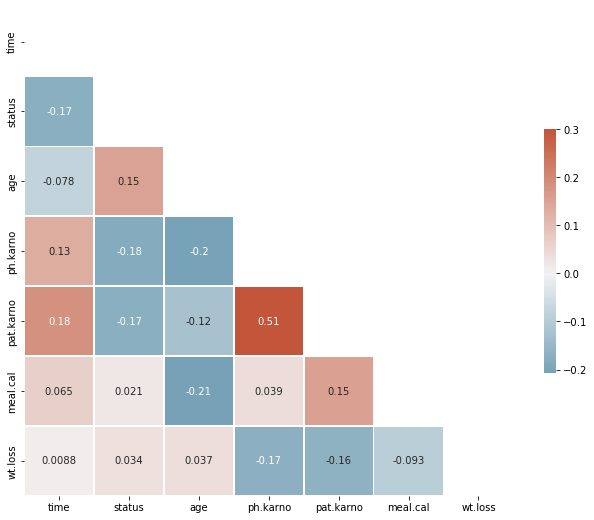

In [49]:
corr_df(df_lung)

In [50]:
#Ajuste do modelo 
T = df_lung['time'] #Tempos de falha e censura 
E = df_lung['status'] #status

In [54]:
print(f'Número de falhas: {E.sum()}')
print(f'Número de censuras: {E[E == 0].count()}')
print(f'Participantes da pesquisa: {E.shape[0]}')

Número de falhas: 165
Número de censuras: 63
Participantes da pesquisa: 228


# Estimação na ausência de censura

In [ ]:
df_sem_censura = df_lung[df_lung.status == 1][['time', 'status']]
T_sem_censura = df_sem_censura['time']
E_sem_censura = df_sem_censura['status']

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[(0.0, 883.0), Text(0.5, 1.0, 'Distribuição de tempo sem censura')]

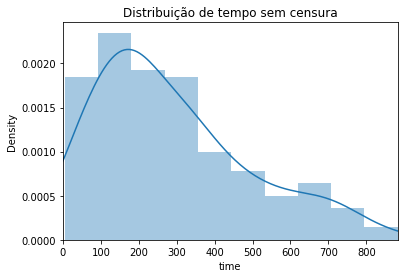

In [ ]:
sns.distplot(T_sem_censura,bins=10).set(
    title='Distribuição de tempo sem censura',
    xlim=(0,max(T_sem_censura))
)

Fitting Distributions

In [ ]:
%pip install fitter
from fitter import Fitter, get_common_distributions, get_distributions

     |████████████████████████████████| 47 kB 3.9 MB/s 
  Created wheel for fitter: filename=fitter-1.4.0-py3-none-any.whl size=25026 sha256=b4b569949c23c90d1d865995655eeeb8128a44c50940d666a439967b1c254c34
  Stored in directory: /root/.cache/pip/wheels/e1/98/16/e5263962f94fbfaad79902aa94652516caccc1f1d51509e853
  Created wheel for easydev: filename=easydev-0.12.0-py3-none-any.whl size=64232 sha256=0571e22a612a69cc1914eec0f231c8c691b463b61c9f2d9dea5d19badfa4ce0d
  Stored in directory: /root/.cache/pip/wheels/82/ab/83/fdfc4017ea44a585b6754752cc5f63f2d0d63fcc1317e7174b
Successfully built fitter easydev


In [ ]:
f = Fitter(T_sem_censura)
f.fit()

,sumsquare_error,aic,bic,kl_div
ncf,0.000083,1447.178737,-2289.960925,inf
nakagami,0.000085,1433.831769,-2297.394723,inf
foldcauchy,0.000085,1473.295172,-2297.360199,inf
burr,0.000085,1448.904261,-2292.234108,inf
burr12,0.000085,1440.978588,-2291.849260,inf


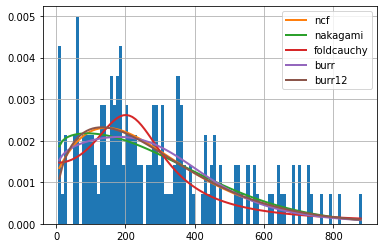

In [ ]:
f.summary()

,sumsquare_error,aic,bic,kl_div
burr,0.000085,1448.904261,-2292.234108,inf
gamma,0.000085,1441.922647,-2295.680525,inf
beta,0.000086,1424.929759,-2288.720854,inf
exponnorm,0.000087,1451.029572,-2293.304077,inf
expon,0.000102,1443.232223,-2271.749642,inf


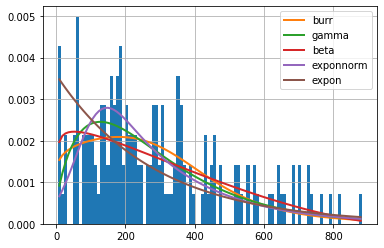

In [ ]:
f = Fitter(T_sem_censura,
           distributions=[
                          'gamma',
                          'beta',
                          'norm',
                          'expon',
                          'norm',
                          'exponnorm',
                          'burr'
           ])
f.fit()
f.summary()

In [ ]:
f.get_best(method = 'sumsquare_error')

{'burr': {'c': 3.97382466095576,
  'd': 0.282115737529533,
  'loc': -1.8063408981647227,
  'scale': 464.4553632085208}}

A distribuição Gamma é a que mais se adequa considerando o critério de soma residual de erros. Conta com os seguintes parâmetros:
- forma = 1.84
- location = -8.52
- escala = 160.63

In [ ]:
f.fitted_param["gamma"] # forma, location, scale

(1.8476567723149222, -8.520674867120434, 160.63018405667242)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[(0.0, 883.0), Text(0.5, 1.0, 'Distribuição de tempo sem censura')]

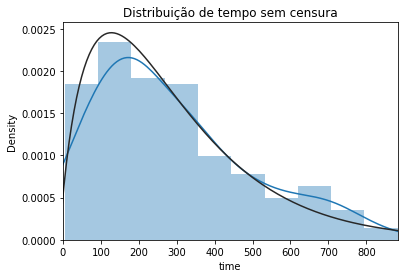

In [ ]:
from scipy.stats import gamma

sns.distplot(T_sem_censura,
             fit=gamma).set(
    title='Distribuição de tempo sem censura',
    xlim=(0,max(T_sem_censura),)
)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[(0.0, 1022.0), Text(0.5, 1.0, 'Distribuição de tempo com censura')]

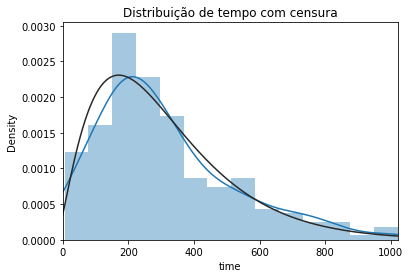

In [ ]:
from scipy.stats import gamma

sns.distplot(df_lung['time'],
             fit=gamma).set(
    title='Distribuição de tempo com censura',
    xlim=(0,max(df_lung['time']),)
)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[(0.0, 883.0), Text(0.5, 1.0, 'Distribuição de tempo sem censura')]

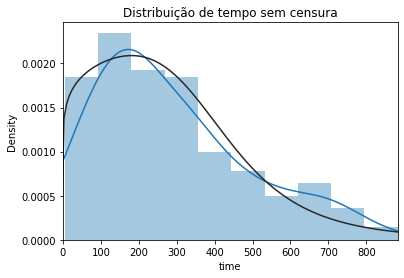

In [ ]:
from scipy.stats import burr

sns.distplot(T_sem_censura,
             fit=burr).set(
    title='Distribuição de tempo sem censura',
    xlim=(0,max(T_sem_censura),)
)

In [ ]:
df = df_lung[['time', 'status']]
df.head()

,time,status
0,306,1
1,455,1
2,1010,0
3,210,1
4,883,1


In [ ]:
t_i = df[df['status']==1]['time'].values
t_i = np.unique(t_i)
t_i = np.append(t_i, 0)
t_i.sort()
t_i = np.append(t_i, max(df['time']))
t_i

array([   0,    5,   11,   12,   13,   15,   26,   30,   31,   53,   54,
         59,   60,   61,   62,   65,   79,   81,   88,   92,   93,   95,
        107,  110,  116,  118,  122,  131,  132,  135,  142,  144,  145,
        147,  153,  156,  163,  166,  167,  170,  175,  176,  179,  180,
        181,  182,  183,  186,  189,  194,  197,  199,  201,  202,  207,
        210,  212,  218,  222,  223,  226,  229,  230,  239,  245,  246,
        267,  268,  269,  270,  283,  284,  285,  286,  288,  291,  293,
        301,  303,  305,  306,  310,  320,  329,  337,  340,  345,  348,
        350,  351,  353,  361,  363,  364,  371,  387,  390,  394,  426,
        428,  429,  433,  442,  444,  450,  455,  457,  460,  473,  477,
        519,  520,  524,  533,  550,  558,  567,  574,  583,  613,  624,
        641,  643,  654,  655,  687,  689,  705,  707,  728,  731,  735,
        765,  791,  814,  883, 1022])

In [ ]:
labels = [i for i in range(0,len(t_i)-1)]
len(labels)

136

In [ ]:
df['t_i'] = pd.cut(df['time'], bins=t_i, labels=labels)
df['interval'] = pd.cut(df['time'], bins=t_i)
df.head(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,time,status,t_i,interval
0,306,1,79,"(305, 306]"
1,455,1,104,"(450, 455]"
2,1010,0,135,"(883, 1022]"
3,210,1,54,"(207, 210]"
4,883,1,134,"(814, 883]"
5,1022,0,135,"(883, 1022]"
6,310,1,80,"(306, 310]"
7,361,1,90,"(353, 361]"
8,218,1,56,"(212, 218]"
9,166,1,36,"(163, 166]"


In [ ]:
df.sort_values(by='t_i', inplace=True)
df

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,time,status,t_i,interval
56,5,1,0,"(0, 5]"
72,11,1,1,"(5, 11]"
107,11,1,1,"(5, 11]"
29,12,1,2,"(11, 12]"
115,13,1,3,"(12, 13]"
...,...,...,...,...
70,840,0,134,"(814, 883]"
67,821,0,134,"(814, 883]"
5,1022,0,135,"(883, 1022]"
2,1010,0,135,"(883, 1022]"


In [ ]:
df = df[['t_i', 'interval', 'time', 'status']]
df

,t_i,interval,time,status
56,0,"(0, 5]",5,1
72,1,"(5, 11]",11,1
107,1,"(5, 11]",11,1
29,2,"(11, 12]",12,1
115,3,"(12, 13]",13,1
...,...,...,...,...
70,134,"(814, 883]",840,0
67,134,"(814, 883]",821,0
5,135,"(883, 1022]",1022,0
2,135,"(883, 1022]",1010,0


In [ ]:
df['falhas'] = pd.get_dummies(df['status'])[1]
df['censuras'] = pd.get_dummies(df['status'])[0]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df.drop('status', inplace=True, axis=1)
df.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,t_i,interval,time,falhas,censuras
56,0,"(0, 5]",5,1,0
72,1,"(5, 11]",11,1,0
107,1,"(5, 11]",11,1,0
29,2,"(11, 12]",12,1,0
115,3,"(12, 13]",13,1,0


In [ ]:
len(df['interval'].unique())

136

In [ ]:
df_group = df[['t_i', 'interval', 'falhas', 'censuras']].groupby(['t_i']).sum()
df_group['interval'] = df['interval'].unique()

In [ ]:
df_group.head()

,falhas,censuras,interval
t_i,,,
0,1,0,"(0, 5]"
1,2,0,"(5, 11]"
2,1,0,"(11, 12]"
3,2,0,"(12, 13]"
4,1,0,"(13, 15]"


In [ ]:
# TODO: fazer análise com estimador atuarial e Nelson lá
# TODO: criar uma tabela final com todos os estimadores e avaliar

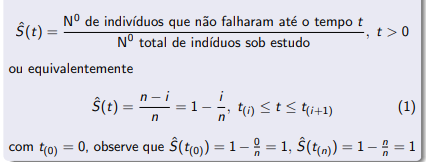

In [ ]:
def get_survival_byhand(df):
  df = df[['time', 'status']]

  t_i = df[df['status']==1]['time'].values
  t_i = np.unique(t_i)
  t_i = np.append(t_i, 0)
  t_i.sort()
  t_i = np.append(t_i, max(df['time']))

  labels = [i for i in range(0,len(t_i)-1)]

  df['t_i'] = pd.cut(df['time'], bins=t_i, labels=labels)
  df['interval'] = pd.cut(df['time'], bins=t_i)

  df.sort_values(by='t_i', inplace=True)

  df = df[['t_i', 'interval', 'time', 'status']]

  df['falhas'] = pd.get_dummies(df['status'])[1]
  df['censuras'] = pd.get_dummies(df['status'])[0]

  df.drop('status', inplace=True, axis=1)

  df_group = df[['t_i', 'interval', 'falhas', 'censuras']].groupby(['t_i']).sum()
  df_group['interval'] = df['interval'].unique()

  df_group.reset_index(inplace=True)
  df_group = df_group[['t_i', 'interval', 'falhas', 'censuras']]

  n_total = len(df_lung) # em risco em t_i
  n_i = n_total
  S_chapeu = []

  for row in df_group.iterrows():
    t_i = row[1][0]
    interval = row[1][1]
    falhas = row[1][2]
    censuras = row[1][3]

    # TODO: calcular S
    S_chapeu.append(n_i / n_total)

    # TODO: atualizer n_i
    n_i = n_i - falhas - censuras

  df_group['S_chapeu'] = S_chapeu

  return df_group

In [ ]:
df = get_survival_byhand(df_lung)
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_g

,t_i,interval,falhas,censuras,S_chapeu
0,0,"(0, 5]",1,0,1.000000
1,1,"(5, 11]",2,0,0.995516
2,2,"(11, 12]",1,0,0.986547
3,3,"(12, 13]",2,0,0.982063
4,4,"(13, 15]",1,0,0.973094


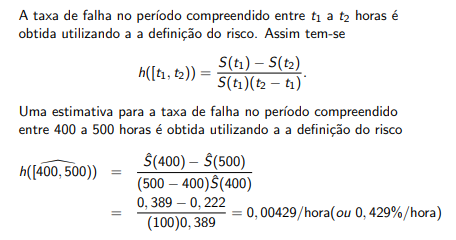

In [ ]:
taxa_risco = []

for row in df.iterrows():
  interval_i = row[1][1]

  S_left = row[1][4]
  if row[0] < (len(df)-1):
    S_right = df['S_chapeu'][row[0]+1]

    interval_left = interval.left
    interval_right = interval.right

    # calcula taxa de risco em t_i
    taxa_i = (S_left - S_right) / ((interval_right - interval_left)*S_left)
    taxa_risco.append(taxa_i) 

taxa_risco.append(np.nan)

NameError: ignored

In [ ]:
df['taxa_risco'] = taxa_risco
df.head()

In [ ]:
df['taxa_risco'].plot()

In [ ]:
df['S_chapeu'].plot()

# Análise de Sobrevivência

(0, 1200)

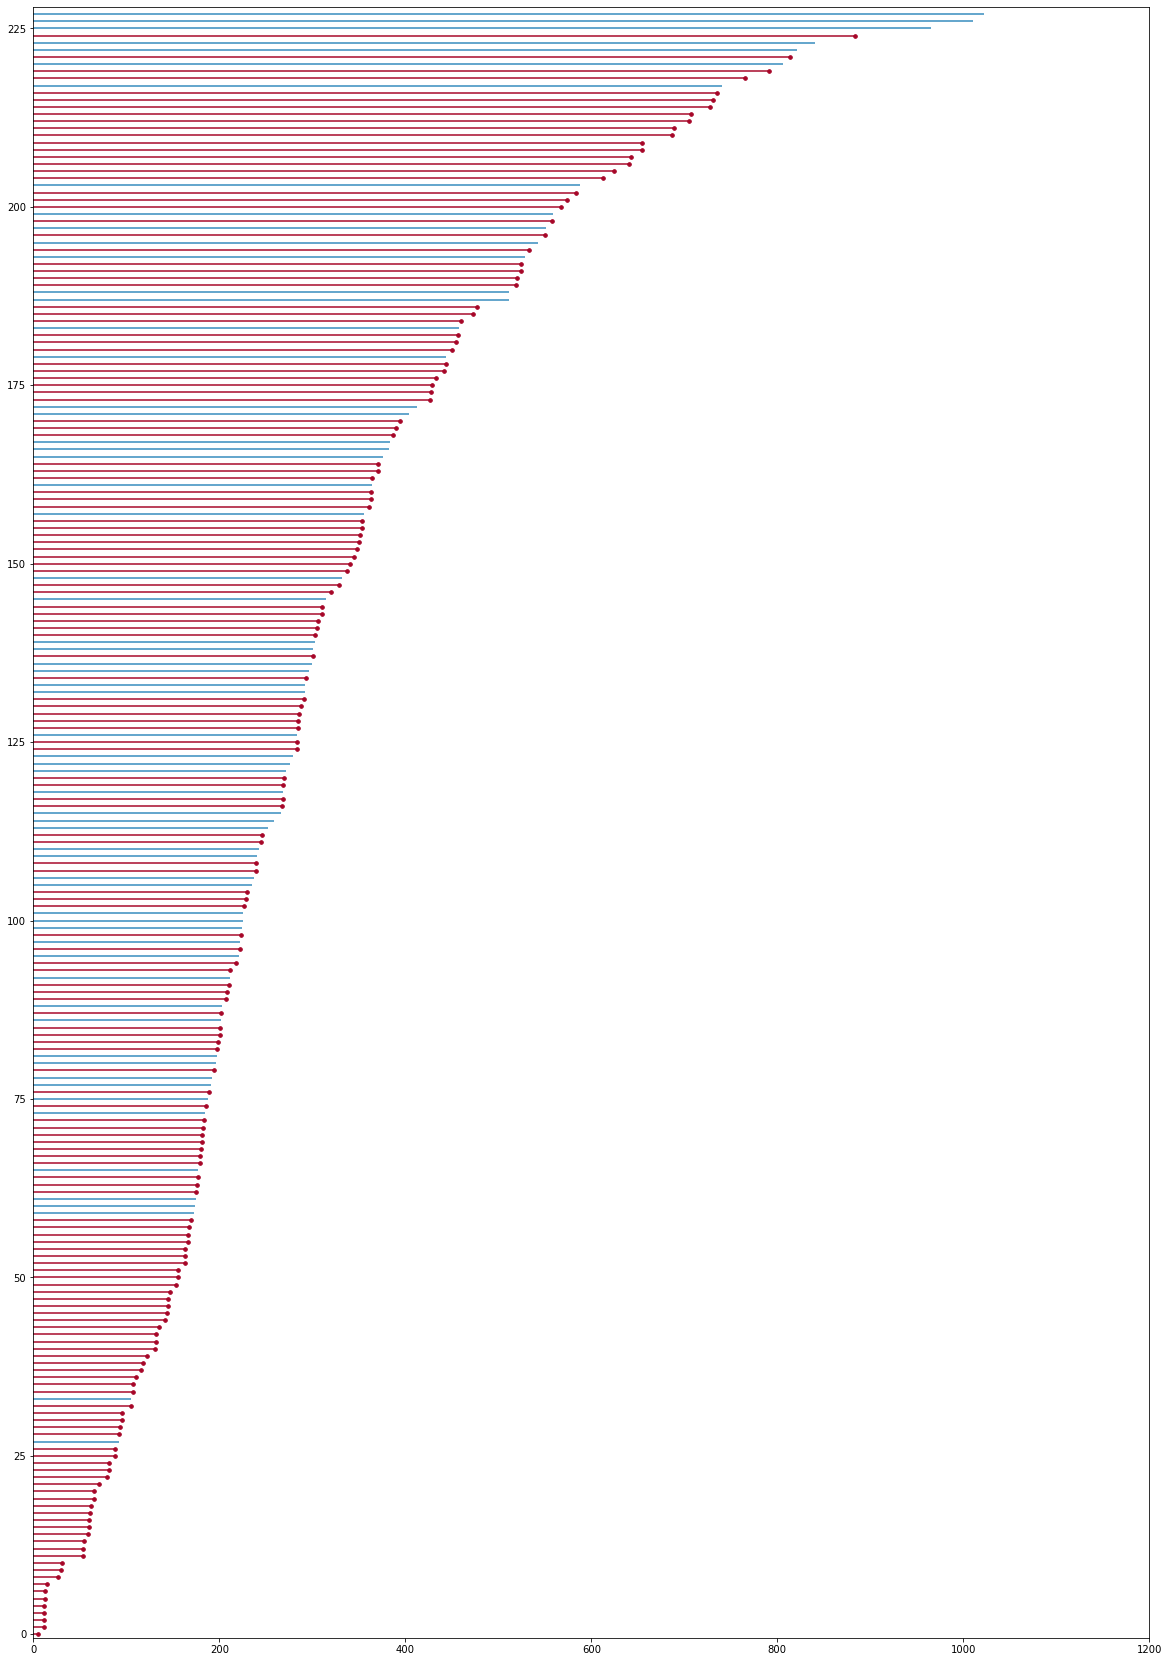

In [115]:
from lifelines.plotting import plot_lifetimes
plt.figure(figsize=(20,30))
ax = plot_lifetimes(T, event_observed=E)
# ax.vlines(10, 0, 30, lw=1, linestyles='--')
ax.set_xlim(0, 1200)

## Estimador Não Paramétrico de Kaplan-Meier

In [186]:
from lifelines import KaplanMeierFitter

T = survival.time
E = survival.event
kmf = KaplanMeierFitter()
kmf.fit(T, event_observed=E)

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 228 total observations, 63 right-censored observations>

Event Table:
* **event_at**: It stores the value of the timeline for the dataset concerned. i.e., when was the patient observed in the observation. In this case, it is in days. It stores the number of survival days for each subject.

* **observed**: These are the number of people that died during the time frame of the experiment. To generalize these are basically the people who met out event of interest.

* **entrance**: It contains the number of new people encountered in a given timeline. There might be cases, where new groups of patients are diagnosed with the disease. The entrance column, basically, accounts for that.

* **censored**: Since we are mainly concerned in finding the survival probability of a patient. At the end of the experiment, if the person is still alive, then they will be added to the censored category.

* **removed**: It stores the value of patients who are no longer a part of our experiment. A patient will fall in this category if they either die or are censored.
$removed=observed+censored$

* **at_risk**: It stored the value of the number of current patients who are under the observation. At the beginning, it will be nothing but the total number of patients we are concerned during the experiment. But later on, the value will increase with the addition of any newly diagnosed patient during that particular timeframe.
$at\_risk=current patients at\_risk+entrance−removed$



Text(0.5, 1.0, 'Kaplan-Meier Cumulative')

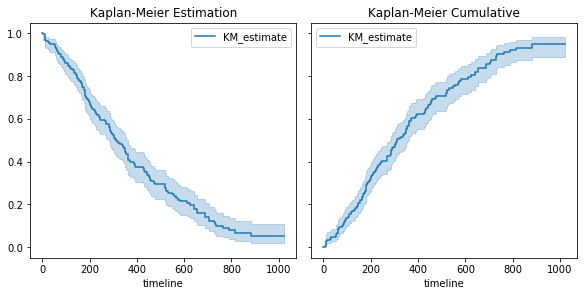

In [85]:
fig, ax = multifig(col=2, row=1, figsize=(8,4))

ax0 = kmf.plot_survival_function(ax=ax[0])
ax[0].set_title('Kaplan-Meier Estimation')

ax1 = kmf.plot_cumulative_density(ax=ax[1])
ax[1].set_title('Kaplan-Meier Cumulative')

In [ ]:
from lifelines.utils import median_survival_times

median_ = kmf.median_survival_time_
median_confidence_interval_ = median_survival_times(kmf.confidence_interval_)
print(f"Mediana: {median_}")
print("Intervalo de Confiança da mediana:")
print(median_confidence_interval_)

Mediana: 310.0
Intervalo de Confiança da mediana:
     KM_estimate_lower_0.95  KM_estimate_upper_0.95
0.5                   284.0                   361.0


In [117]:
#TODO: hazard function (função de risco)
#TODO: média de kmf

In [119]:
#Tabela do estimador KM
# kmf.event_table.head()

In [120]:
# from lifelines.utils import restricted_mean_survival_time

# restricted_mean_survival_time(kmf)

In [126]:
# #Probabilidades de Sobrevivência 
# print(survival_f)
# print('Mediana:', kmf.median_survival_time_) #mediana
# print('Media:', survival_f.mean())
# survival_f.loc[280:300]
# # kmf.predict(0.546)

In [128]:
# #IC de curva de sobrevivência
# kmf.fit(T, E, timeline=range(0, 100, 2)) # muda range de tempo para 0-100, 2 em 2

# kmf.survival_function_   # index is now the same as range(0, 100, 2)

In [ ]:
#Probabilidade de sobrevivência maior que 500 dias
kmf.predict(500) 

0.3000717924530129

### Por grupo

#### Sexo

/tmp/ipykernel_13916/54279092.py:63: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot()


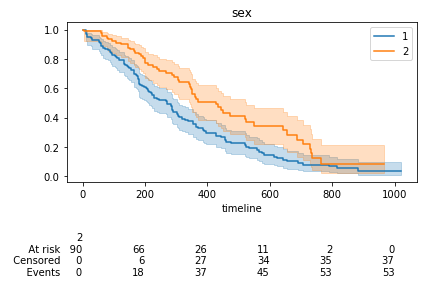

In [200]:
survival.surv_group(kmf, 'sex')

In [ ]:
#Comparação dos tempos de vida mediano e probabilidade de sobrevivência entre homens e mulheres
median_ = kmf1.median_survival_time_
median_confidence_interval_ = median_survival_times(kmf1.confidence_interval_)

median2_ = kmf2.median_survival_time_
median2_confidence_interval_ = median_survival_times(kmf2.confidence_interval_)


print('Tempo de Vida Mediano Homens')
print(median_)
print(median_confidence_interval_)

print('Tempo de Vida Mediano Mulheres')
print(median2_)
print(median2_confidence_interval_)


print('Probabilidade de sobrevivência após 600 dias')
print('Male:', kmf1.predict(600))
print('Female:', kmf2.predict(600))

Tempo de Vida Mediano Homens
270.0
     Male_lower_0.95  Male_upper_0.95
0.5            210.0            306.0
Tempo de Vida Mediano Mulheres
426.0
     Female_lower_0.95  Female_upper_0.95
0.5              345.0              524.0
Probabilidade de sobrevivência após 600 dias
Male: 0.14508759806732163
Female: 0.3432595794926025


In [ ]:
kmf1 = kmf.fit(T[ix], E[ix], label='Male')
kmf2 = kmf.fit(T[~ix], E[~ix], label='Female')

statistics_per_group(kmf1, kmf2)

Tempo de Vida Mediano 1
426.0
Tempo de Vida Mediano 2
426.0
Probabilidade de sobrevivência após 600 dias
1: 0.3432595794926025
2: 0.3432595794926025


In [ ]:
results = logrank_test(T[ix], T[~ix], event_observed_A=T[ix], event_observed_B=T[~ix])

results.print_summary()
print()
print(f'Results p_value: {round(results.p_value,5)}')
print(f'Resultado do test_statistic: {round(results.test_statistic,5)}')

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           2.11 0.15      2.77


Results p_value: 0.1467
Resultado do test_statistic: 2.10628


In [ ]:
groups = df_lung['sex']
ix = (groups == 1.) # Male

kmf1 = KaplanMeierFitter()
kmf1.fit(T[ix], event_observed=E[ix], label = 'Male')

kmf2 = KaplanMeierFitter()
kmf2.fit(T[~ix], event_observed=E[~ix], label = 'Male')

statistics_per_group(kmf1, kmf2)


Tempo de Vida Mediano 1
270.0
Tempo de Vida Mediano 2
426.0
Probabilidade de sobrevivência após 600 dias
1: 0.14508759806732163
2: 0.3432595794926025


## By age

Text(0.5, 1.0, 'Curvas de sobrevivência por idade usando KM')

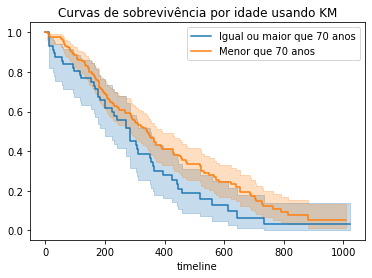

In [208]:
groups = df_lung['age']

ix = (groups >= 70) 

kmf.fit(T[ix], E[ix], label='Igual ou maior que 70 anos')
ax = kmf.plot_survival_function()

kmf.fit(T[~ix], E[~ix], label='Menor que 70 anos')
ax = kmf.plot_survival_function(ax=ax)

plt.title("Curvas de sobrevivência por idade usando KM")


In [215]:
groups = df_lung['age']
ix = (groups >= 70) 

kmf1 = kmf.fit(T[ix], E[ix], label='Igual ou maior que 70 anos')
kmf2 = kmf.fit(T[~ix], E[~ix], label='Menor que 70 anos')

statistics_per_group(kmf1, kmf2)

Tempo de Vida Mediano 1: 340.0

Tempo de Vida Mediano 2: 340.0

Probabilidade de sobrevivência após 600 dias
1: 0.24505969911638734
2: 0.24505969911638734


In [204]:
statistics_per_group(kmf1, kmf2)

Tempo de Vida Mediano 1
270.0
Tempo de Vida Mediano 2
426.0
Probabilidade de sobrevivência após 600 dias
1: 0.14508759806732163
2: 0.3432595794926025


In [206]:
results = logrank_test(T[ix], T[~ix], event_observed_A=E[ix], event_observed_B=E[~ix])

results.print_summary()
print(results.p_value)        
print(results.test_statistic)

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           4.05 0.04      4.50

0.04420976155421005
4.048532478343562


## Por wt.loss

Text(0.5, 1.0, 'Curvas de sobrevivência por perda de peso usando KM')

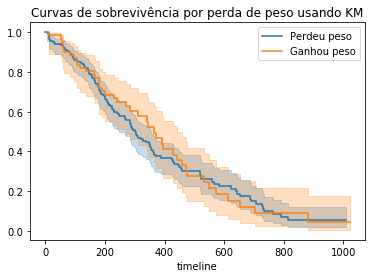

In [217]:
groups = df_lung['wt.loss']
ix = (groups > 0)

kmf.fit(T[ix], E[ix], label='Perdeu peso')
ax = kmf.plot_survival_function()

kmf.fit(T[~ix], E[~ix], label='Ganhou peso')
ax = kmf.plot_survival_function(ax=ax)

plt.title("Curvas de sobrevivência por perda de peso usando KM")

In [218]:
results = logrank_test(T[ix], T[~ix], event_observed_A=T[ix], event_observed_B=T[~ix])

results.print_summary()
print(f'Results p_value: {results.p_value}')
print(f'Resultado do test_statistic: {results.test_statistic}')

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           0.11 0.74      0.43

Results p_value: 0.7446172573672312
Resultado do test_statistic: 0.10610983695460435


In [219]:
groups = df_lung['wt.loss']
ix = (groups > 0)

kmf1 = KaplanMeierFitter()
kmf1.fit(T[ix], event_observed=E[ix], label = 'Perdeu peso')

kmf2 = KaplanMeierFitter()
kmf2.fit(T[~ix], event_observed=E[~ix], label = 'ganhou peso')

statistics_per_group(kmf1, kmf2)


Tempo de Vida Mediano 1: 301.0

Tempo de Vida Mediano 2: 363.0

Probabilidade de sobrevivência após 600 dias
1: 0.2241927837115324
2: 0.18295924722735515


## Por ph.karno

Text(0.5, 1.0, 'Curvas de sobrevivência por score de ph.karno usando KM')

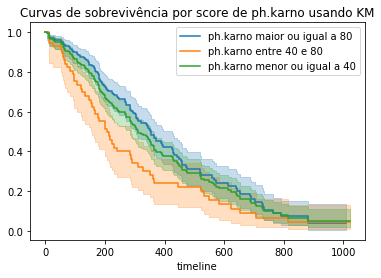

In [224]:
groups = df_lung['ph.karno']
bem = (groups >= 80.)
medio = (groups < 80) & (groups > 40)
mal = (groups >= 40.)

# Bem
kmf.fit(T[bem], E[bem], label='ph.karno maior ou igual a 80')
ax = kmf.plot_survival_function()

# medio
kmf.fit(T[medio], E[medio], label='ph.karno entre 40 e 80')
ax = kmf.plot_survival_function(ax=ax)

# mal
kmf.fit(T[mal], E[mal], label='ph.karno menor ou igual a 40')
ax = kmf.plot_survival_function(ax=ax)

plt.title("Curvas de sobrevivência por score de ph.karno usando KM")


In [225]:
karno_level = [group_karno(score) for score in df_lung['ph.karno']]

In [226]:
results = multivariate_logrank_test(T, karno_level, E)
results.print_summary()

<lifelines.StatisticalResult: multivariate_logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = multivariate_logrank_test

---
 test_statistic    p  -log2(p)
           6.98 0.01      6.92

In [227]:
def statistics_kmf(kmf1):
  median_ = kmf1.median_survival_time_
  print('Tempo de Vida Mediano 1', median_)

  print('Probabilidade de sobrevivência após 600 dias')
  print('1:', kmf1.predict(600))

In [228]:
def statistics_per_group_for_3(kmf1, kmf2, kmf3):
  median_ = kmf1.median_survival_time_
  median2_ = kmf2.median_survival_time_
  median3_ = kmf3.median_survival_time_

  print('Tempo de Vida Mediano 1', median_)
  print('Tempo de Vida Mediano 2', median2_)
  print('Tempo de Vida Mediano 2', median3_)


  print('Probabilidade de sobrevivência após 600 dias')
  print('1:', kmf1.predict(600))
  print('2:', kmf2.predict(600))
  print('3:', kmf3.predict(600))

In [229]:
groups = df_lung['ph.karno']
bem = (groups >= 80.)
medio = (groups < 80) & (groups > 40)
mal = (groups >= 40.)

kmf1 = KaplanMeierFitter()
kmf1.fit(T[bem], event_observed=E[bem], label = 'bem')

kmf2 = KaplanMeierFitter()
kmf2.fit(T[medio], event_observed=E[medio], label = 'medio')

kmf3 = KaplanMeierFitter()
kmf3.fit(T[mal], event_observed=E[mal], label = 'medio')

statistics_per_group_for_3(kmf1, kmf2, kmf3)


Tempo de Vida Mediano 1 353.0
Tempo de Vida Mediano 2 208.0
Tempo de Vida Mediano 2 310.0
Probabilidade de sobrevivência após 600 dias
1: 0.24176804891232076
2: 0.13331954762748385
3: 0.21358725848222598


## Por ph.ecog

In [230]:
groups = df_lung['ph.ecog']
zero = (groups == 0.) 
um = (groups == 1.)
dois = (groups == 2.)
tres = (groups == 3.)

Text(0.5, 1.0, 'Curvas de sobrevivência por score de ph.ecog usando KM')

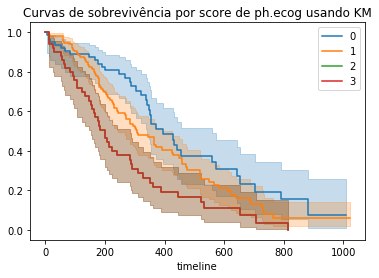

In [231]:
# zero
kmf.fit(T[zero], E[zero], label='0')
ax = kmf.plot_survival_function()

# 1
kmf.fit(T[um], E[um], label='1')
ax = kmf.plot_survival_function(ax=ax)

# 2
kmf.fit(T[dois], E[dois], label='2')
ax = kmf.plot_survival_function(ax=ax)

# 3
kmf.fit(T[dois], E[dois], label='3')
ax = kmf.plot_survival_function(ax=ax)

plt.title("Curvas de sobrevivência por score de ph.ecog usando KM")

In [232]:
groups = df_lung['ph.ecog']
zero = (groups == 0.) 
um = (groups == 1.)
dois = (groups == 2.)
tres = (groups == 3.)

kmf1 = KaplanMeierFitter()
kmf1.fit(T[zero], event_observed=E[zero])

kmf2 = KaplanMeierFitter()
kmf2.fit(T[um], event_observed=E[um])

kmf3 = KaplanMeierFitter()
kmf3.fit(T[dois], event_observed=E[dois])

kmf4 = KaplanMeierFitter()
kmf4.fit(T[tres], event_observed=E[tres])

statistics_kmf(kmf1)
statistics_kmf(kmf2)
statistics_kmf(kmf3)
statistics_kmf(kmf4)


Tempo de Vida Mediano 1 394.0
Probabilidade de sobrevivência após 600 dias
1: 0.30897763809461726
Tempo de Vida Mediano 1 306.0
Probabilidade de sobrevivência após 600 dias
1: 0.21094467579067205
Tempo de Vida Mediano 1 199.0
Probabilidade de sobrevivência após 600 dias
1: 0.11133727810650888
Tempo de Vida Mediano 1 118.0
Probabilidade de sobrevivência após 600 dias
1: 0.0


In [233]:
from lifelines.statistics import multivariate_logrank_test

results = multivariate_logrank_test(T, df_lung['ph.ecog'], E)
results.print_summary()

<lifelines.StatisticalResult: multivariate_logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 4
         test_name = multivariate_logrank_test

---
 test_statistic      p  -log2(p)
          29.82 <0.005     17.52

## Estimador de Nelson Aaler 

In [234]:
# TODO: naf ta todo zuado, dando prob maior q 1.0
# TODO: funções aparentemente diferentes de kaplanmeier da lib
# TODO: fazer estimador atuarial
# TODO: tabela 

In [ ]:
from lifelines import NelsonAalenFitter

naf = NelsonAalenFitter()
naf.fit(T, event_observed=E)

<lifelines.NelsonAalenFitter:"NA_estimate", fitted with 223 total observations, 63 right-censored observations>

In [ ]:
from numpy.ma.core import exp

print(naf.cumulative_hazard_)
teste = naf.cumulative_hazard_.copy()

lista=[]
for i in teste['NA_estimate']:
  lista += [exp(-i)]





          NA_estimate
timeline             
0.0          0.000000
5.0          0.004484
11.0         0.013514
12.0         0.018059
13.0         0.027213
...               ...
840.0        2.618688
883.0        2.868688
965.0        2.868688
1010.0       2.868688
1022.0       2.868688

[185 rows x 1 columns]


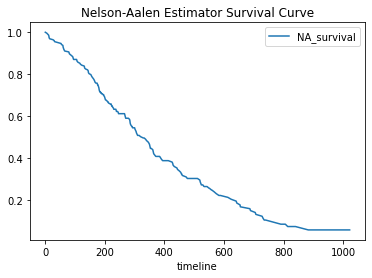

In [ ]:
teste['NA_survival']=lista
teste
na = teste.drop(['NA_estimate'], axis = 1)
na.plot()
plt.title("Nelson-Aalen Estimator Survival Curve");


In [ ]:
teste2 = na.copy()

teste2['KM_estimate'] = survival_f

teste2

,NA_survival,KM_estimate
timeline,,
0.0,1.000000,1.000000
5.0,0.995526,0.995516
11.0,0.986577,0.986547
12.0,0.982103,0.982063
13.0,0.973154,0.973094
...,...,...
840.0,0.072898,0.068684
883.0,0.056773,0.051513
965.0,0.056773,0.051513


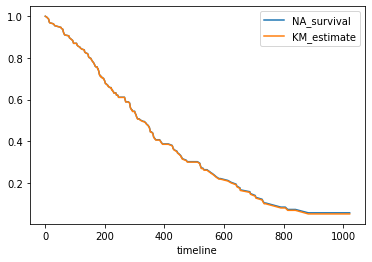

In [ ]:
teste2.plot()
plt.title("Comparativo entre estimador Kaplan e Nelson")


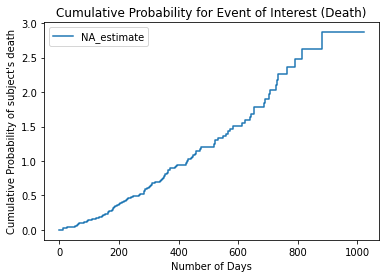

In [ ]:
naf.plot_cumulative_hazard(ci_show=False)
plt.title("Cumulative Probability for Event of Interest (Death)")
plt.xlabel("Number of Days")
plt.ylabel("Cumulative Probability of subject's death");

In [ ]:
naf.event_table

In [ ]:
naf.ci_labels

In [ ]:
naf.confidence_interval_

,NA_estimate_lower_0.95,NA_estimate_upper_0.95
0.0,0.000000,0.000000
5.0,0.000632,0.031834
11.0,0.004358,0.041900
12.0,0.006778,0.048118
13.0,0.012225,0.060573
...,...,...
840.0,2.036713,3.366958
883.0,2.155069,3.818611
965.0,2.155069,3.818611
1010.0,2.155069,3.818611


In [ ]:
naf.confidence_interval_cumulative_hazard_

,NA_estimate_lower_0.95,NA_estimate_upper_0.95
0.0,0.000000,0.000000
5.0,0.000632,0.031834
11.0,0.004358,0.041900
12.0,0.006778,0.048118
13.0,0.012225,0.060573
...,...,...
840.0,2.036713,3.366958
883.0,2.155069,3.818611
965.0,2.155069,3.818611
1010.0,2.155069,3.818611


Text(0.5, 1.0, 'Nelson-Aalen Confidente Interval')

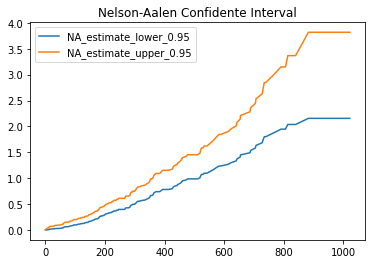

In [ ]:
naf.confidence_interval_.plot()
plt.title("Nelson-Aalen Confidente Interval")


## Modelo Semi-Paramétricos Cox

In [236]:
dummies_ecog = pd.get_dummies(df_lung["ph.ecog"], prefix = 'ecog')
dummies_ecog.head(4)

,ecog_0.0,ecog_0.9515418502202643,ecog_1.0,ecog_2.0,ecog_3.0
0,0,0,1,0,0
1,1,0,0,0,0
2,1,0,0,0,0
3,0,0,1,0,0


In [239]:
dummies_ecog = dummies_ecog[["ecog_1.0", "ecog_2.0"]]
df_lung = pd.concat([df_lung, dummies_ecog], axis = 1)
df_lung = df_lung.drop("ph.ecog", axis = 1)
df_lung.head()

,inst,time,status,age,sex,ph.karno,pat.karno,meal.cal,wt.loss,ecog_1.0,ecog_2.0
0,3.0,306,1,74,1,90.0,100.0,1175.000000,9.831776,1,0
1,3.0,455,1,68,1,90.0,90.0,1225.000000,15.000000,0,0
2,3.0,1010,0,56,1,90.0,90.0,928.779006,15.000000,0,0
3,5.0,210,1,57,1,90.0,60.0,1150.000000,11.000000,1,0
4,1.0,883,1,60,1,100.0,90.0,928.779006,0.000000,0,0


In [276]:
from lifelines import CoxPHFitter
cph = CoxPHFitter()
cph.fit(df_lung, duration_col = 'time', event_col = 'status')

<lifelines.CoxPHFitter: fitted with 228 total observations, 63 right-censored observations>

In [275]:
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 228 total observations, 63 right-censored observations>
             duration col = 'time'
                event col = 'status'
      baseline estimation = breslow
   number of observations = 228
number of events observed = 165
   partial log-likelihood = -731.38
         time fit was run = 2022-07-04 18:43:10 UTC

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
inst       -0.02       0.98       0.01            -0.04             0.00                 0.96                 1.00
age         0.01       1.01       0.01            -0.01             0.03                 0.99                 1.03
sex        -0.57       0.56       0.17            -0.91            -0.24                 0.40                 0.79
ph.karno    0.01       1.01       0.01            -0.01             0.03                 0.99                 1.03
pat.karno  -0.01       0.99       0.01            -0.03             0.00                 0.97                 1.00
meal.cal    0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
wt.loss    -0.01       0.99       0.01            -0.02             0.00                 0.98                 1.00
ecog_1.0    0.56       1.75       0.24             0.09             1.03                 1.09                 2.80
ecog_2.0    1.12       3.07       0.38             0.38             1.87                 1.46                 6.47

            cmp to     z      p   -log2(p)
covariate                                 
inst          0.00 -1.80   0.07       3.79
age           0.00  1.39   0.16       2.61
sex           0.00 -3.37 <0.005      10.39
ph.karno      0.00  1.22   0.22       2.16
pat.karno     0.00 -1.78   0.08       3.72
meal.cal      0.00  0.12   0.91       0.14
wt.loss       0.00 -1.66   0.10       3.38
ecog_1.0      0.00  2.33   0.02       5.67
ecog_2.0      0.00  2.95 <0.005       8.29
---
Concordance = 0.64
Partial AIC = 1480.76
log-likelihood ratio test = 37.06 on 9 df
-log2(p) of ll-ratio test = 15.25

exp(coef) = hazard ratio. significa que o aumento de uma unid. de medida em certo atributo, a função de risco aumenta por um fator de exp(coef)% em rel. à função de risco base.

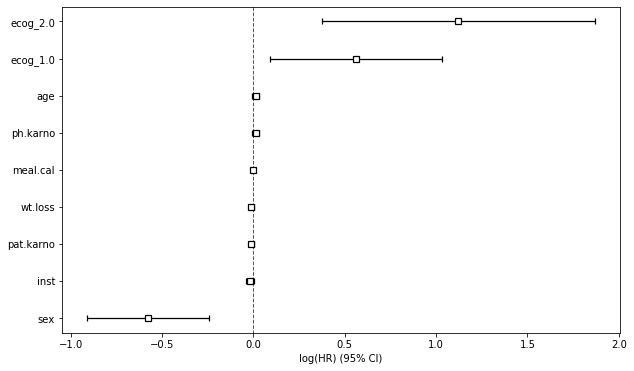

In [242]:
plt.subplots(figsize = (10, 6))
cph.plot()

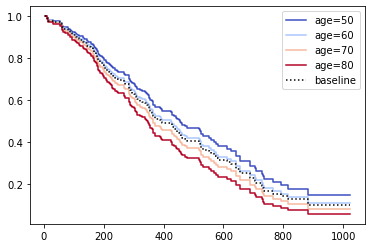

In [243]:
#Plot Partial Effects on Outcome (Cox-PH Regression)
cph.plot_partial_effects_on_outcome(
    covariates = 'age', values = [50, 60, 70, 80], cmap = 'coolwarm')

The null (H0) hypothesis assumed that the proportional hazard criteria satisfied, while alternative hypothesis (H1) infer that the proportional hazard assumption criteria not met (violated).

In [248]:
# Check Proportional Hazard Assumption
cph.check_assumptions(df_lung, p_value_threshold = 0.05)

The ``p_value_threshold`` is set at 0.05. Even under the null hypothesis of no violations, some
covariates will be below the threshold by chance. This is compounded when there are many covariates.
Similarly, when there are lots of observations, even minor deviances from the proportional hazard
assumption will be flagged.

With that in mind, it's best to use a combination of statistical tests and visual tests to determine
the most serious violations. Produce visual plots using ``check_assumptions(..., show_plots=True)``
and looking for non-constant lines. See link [A] below for a full example.



/home/aime/.local/lib/python3.8/site-packages/lifelines/fitters/mixins.py:108: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  for variable in self.params_.index & (columns or self.params_.index):


<lifelines.StatisticalResult: proportional_hazard_test>
 null_distribution = chi squared
degrees_of_freedom = 1
             model = <lifelines.CoxPHFitter: fitted with 228 total observations, 63 right-censored observations>
         test_name = proportional_hazard_test

---
                test_statistic    p  -log2(p)
age       km              0.28 0.59      0.75
          rank            0.10 0.76      0.40
ecog_1.0  km              3.89 0.05      4.37
          rank            3.59 0.06      4.10
ecog_2.0  km              3.36 0.07      3.90
          rank            2.71 0.10      3.32
inst      km              0.01 0.92      0.12
          rank            0.01 0.92      0.13
meal.cal  km              4.09 0.04      4.54
          rank            3.53 0.06      4.06
pat.karno km              0.38 0.54      0.89
          rank            0.31 0.58      0.79
ph.karno  km              5.89 0.02      6.04
          rank            5.24 0.02      5.50
sex       km              2.32 0.13      2.97
          rank            2.22 0.14      2.88
wt.loss   km              0.00 0.98      0.04
          rank            0.01 0.94      0.08



1. Variable 'ph.karno' failed the non-proportional test: p-value is 0.0152.

   Advice 1: the functional form of the variable 'ph.karno' might be incorrect. That is, there may
be non-linear terms missing. The proportional hazard test used is very sensitive to incorrect
functional forms. See documentation in link [D] below on how to specify a functional form.

   Advice 2: try binning the variable 'ph.karno' using pd.cut, and then specify it in
`strata=['ph.karno', ...]` in the call in `.fit`. See documentation in link [B] below.

   Advice 3: try adding an interaction term with your time variable. See documentation in link [C]
below.


2. Variable 'meal.cal' failed the non-proportional test: p-value is 0.0431.

   Advice 1: the functional form of the variable 'meal.cal' might be incorrect. That is, there may
be non-linear terms missing. The proportional hazard test used is very sensitive to incorrect
functional forms. See documentation in link [D] below on how to specify a functional

[]

## Modelos Paramétricos

### Escolha do modelo

In [287]:
from lifelines import WeibullFitter,\
                      ExponentialFitter,\
                      LogNormalFitter,\
                      LogLogisticFitter,\
                      GeneralizedGammaFitter

# Instantiate each fitter
wb = WeibullFitter()
ex = ExponentialFitter()
log = LogNormalFitter()
loglogis = LogLogisticFitter()
gengamma = GeneralizedGammaFitter()

modelos = {
    "Weibull": wb,
    "Exponencial": ex,
    "LogNormal": log,
    "LogLogístico": loglogis,
    "Gama Generalizada": gengamma
}

for modelo in modelos.values():
    modelo.fit(durations=T, event_observed=E)

#### Método de valor AIC

In [289]:
for nome, modelo in modelos.items():
    print("The AIC value for", nome, "is",  modelo.AIC_)

The AIC value for Weibull is 2311.7023761788164
The AIC value for Exponencial is 2326.6763515749335
The AIC value for LogNormal is 2342.538110633835
The AIC value for LogLogístico is 2325.861247022471
The AIC value for Gama Generalizada is 2313.379591161704


Weibull tem o menor valor AIC.

#### Método Gráfico

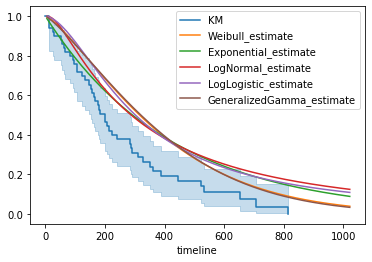

In [296]:
ax = kmf.plot_survival_function(label="KM")
# Fit to data
for model in modelos.values():
    # model.plot_survival_function(ax=ax)
    model.survival_function_.plot(ax=ax)

#### Linearização

In [ ]:
# exponencial
linex = ()

In [281]:
wb.log_likelihood_

-1153.8511880894082

In [283]:
wb.summary

,coef,se(coef),coef lower 95%,coef upper 95%,cmp to,z,p,-log2(p)
lambda_,417.758647,24.704540,369.338638,466.178656,1.0,16.869719,7.515313e-64,209.693565
rho_,1.316840,0.082211,1.155710,1.477970,1.0,3.853998,1.162044e-04,13.071047


Interpretation of AFT Model Results/Estimates

The step-by-step interpretation of the AFT model is described below:

A unit increase in covariate indicates that the mean/median survival time will change by a factor of exp(coefficient).
If the coefficient is positive, then the exp(coefficient) will be >1, which will decelerate the incident/event time. Similarly, a negative coefficient will reduce the mean/median survival time.
Example:

Sex, which contains [0: Male (base) and 1: Female], has a positive coefficient.
This means being a female subject compared to male changes mean/median survival time by exp(0.416) = 1.516, approximately a 52% increase in mean/median survival time.

In [260]:
print(f"Mediana do modelo Weibull: {round(weibull_aft.median_survival_time_, 2)}")
print(f"Média do modelo Weibull: {round(weibull_aft.mean_survival_time_, 2)}")

Mediana do modelo Weibull: 403.21
Média do modelo Weibull: 479.36


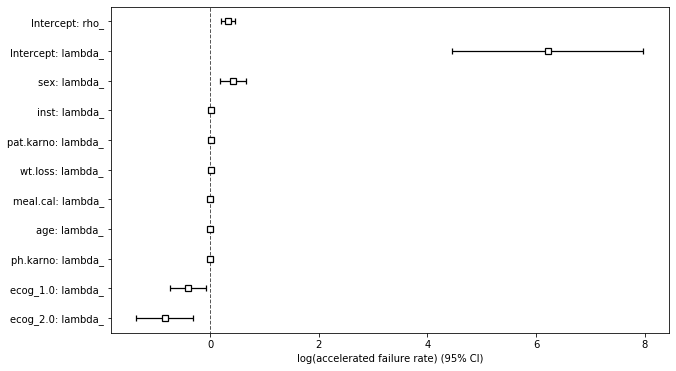

In [261]:
plt.subplots(figsize=(10, 6))
weibull_aft.plot()

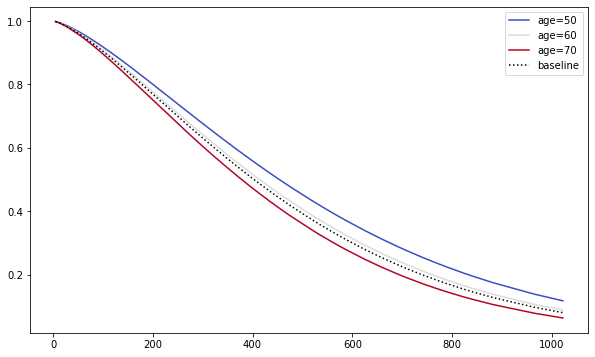

In [262]:
# weibull regression

plt.subplots(figsize=(10, 6))
weibull_aft.plot_partial_effects_on_outcome('age', range(50, 80, 10), cmap='coolwarm')

## Modelos de regressão

In [30]:
from lifelines.datasets import load_rossi
load_rossi()

,week,arrest,fin,age,race,wexp,mar,paro,prio
0,20,1,0,27,1,0,0,1,3
1,17,1,0,18,1,0,0,1,8
2,25,1,0,19,0,1,0,1,13
3,52,0,1,23,1,1,1,1,1
4,52,0,0,19,0,1,0,1,3
...,...,...,...,...,...,...,...,...,...
427,52,0,1,31,0,1,0,1,3
428,52,0,0,20,1,0,0,1,1
429,52,0,1,20,1,1,1,1,1
430,52,0,0,29,1,1,0,1,3


In [79]:
cph = CoxPHFitter()
cph.fit(df_lung.dropna(),
        duration_col='time', 
        event_col='status',
        formula='sex + ph.ecog'
        )
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 227 total observations, 63 right-censored observations>
             duration col = 'time'
                event col = 'status'
      baseline estimation = breslow
   number of observations = 227
number of events observed = 164
   partial log-likelihood = -729.73
         time fit was run = 2022-06-15 18:14:37 UTC

---
                 coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                              
ph.ecog[T.1.0]   0.42       1.52       0.20             0.03             0.81                 1.03                 2.25
ph.ecog[T.2.0]   0.95       2.58       0.22             0.51             1.39                 1.66                 4.01
ph.ecog[T.3.0]   2.05       7.76       1.03             0.04             4.06                 1.04                58.04
sex[T.2]        -0.54       0.58       0.17            -0.87            -0.22                 0.42                 0.81

                 cmp to     z      p   -log2(p)
covariate                                      
ph.ecog[T.1.0]     0.00  2.10   0.04       4.80
ph.ecog[T.2.0]     0.00  4.22 <0.005      15.29
ph.ecog[T.3.0]     0.00  2.00   0.05       4.44
sex[T.2]           0.00 -3.24 <0.005       9.71
---
Concordance = 0.64
Partial AIC = 1467.46
log-likelihood ratio test = 29.50 on 4 df
-log2(p) of ll-ratio test = 17.31

In [81]:
X = df_lung.dropna()
cph.predict_survival_function(X)


,0,1,2,3,4,5,6,7,8,9,...,218,219,220,221,222,223,224,225,226,227
5.0,0.995119,0.996784,0.996784,0.995119,0.996784,0.995119,0.995194,0.995194,0.995119,0.991727,...,0.995194,0.998134,0.995119,0.997167,0.995119,0.995119,0.996784,0.995194,0.995119,0.997167
11.0,0.980591,0.987182,0.987182,0.980591,0.987182,0.980591,0.980890,0.980890,0.980591,0.967273,...,0.980890,0.992547,0.980591,0.988699,0.980591,0.980591,0.987182,0.980890,0.980591,0.988699
12.0,0.975716,0.983948,0.983948,0.975716,0.983948,0.975716,0.976088,0.976088,0.975716,0.959123,...,0.976088,0.990660,0.975716,0.985845,0.975716,0.975716,0.983948,0.976088,0.975716,0.985845
13.0,0.965956,0.977458,0.977458,0.965956,0.977458,0.965956,0.966475,0.966475,0.965956,0.942891,...,0.966475,0.986866,0.965956,0.980115,0.965956,0.965956,0.977458,0.966475,0.965956,0.980115
15.0,0.961046,0.974185,0.974185,0.961046,0.974185,0.961046,0.961639,0.961639,0.961046,0.934769,...,0.961639,0.984948,0.961046,0.977223,0.961046,0.961046,0.974185,0.961639,0.961046,0.977223
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
840.0,0.035458,0.111014,0.111014,0.035458,0.111014,0.035458,0.037345,0.037345,0.035458,0.003450,...,0.037345,0.279529,0.035458,0.144212,0.035458,0.035458,0.111014,0.037345,0.035458,0.144212
883.0,0.025106,0.088446,0.088446,0.025106,0.088446,0.025106,0.026584,0.026584,0.025106,0.001920,...,0.026584,0.245015,0.025106,0.118046,0.025106,0.025106,0.088446,0.026584,0.025106,0.118046
965.0,0.025106,0.088446,0.088446,0.025106,0.088446,0.025106,0.026584,0.026584,0.025106,0.001920,...,0.026584,0.245015,0.025106,0.118046,0.025106,0.025106,0.088446,0.026584,0.025106,0.118046
1010.0,0.025106,0.088446,0.088446,0.025106,0.088446,0.025106,0.026584,0.026584,0.025106,0.001920,...,0.026584,0.245015,0.025106,0.118046,0.025106,0.025106,0.088446,0.026584,0.025106,0.118046


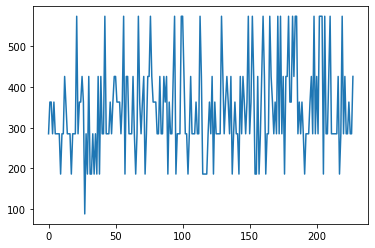

In [76]:
cph.predict_median(X).plot()

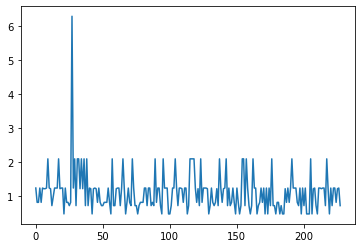

In [75]:
cph.predict_partial_hazard(X).plot()


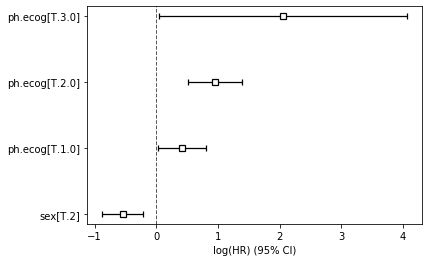

In [57]:
cph.plot()

In [61]:
from collections import Counter
Counter(df_lung.dropna()['ph.ecog'])

Counter({1.0: 113, 0.0: 63, 2.0: 50, 3.0: 1})

In [63]:
load_rossi()

,week,arrest,fin,age,race,wexp,mar,paro,prio
0,20,1,0,27,1,0,0,1,3
1,17,1,0,18,1,0,0,1,8
2,25,1,0,19,0,1,0,1,13
3,52,0,1,23,1,1,1,1,1
4,52,0,0,19,0,1,0,1,3
...,...,...,...,...,...,...,...,...,...
427,52,0,1,31,0,1,0,1,3
428,52,0,0,20,1,0,0,1,1
429,52,0,1,20,1,1,1,1,1
430,52,0,0,29,1,1,0,1,3


In [73]:
df_lung.dropna()['sex'].unique()

[1, 2]
Categories (2, int64): [1, 2]

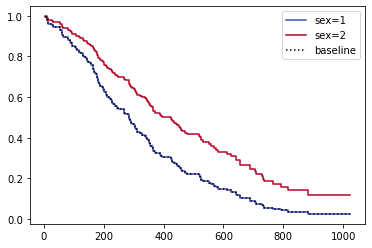

In [74]:
cph.plot_partial_effects_on_outcome(covariates='sex',values=[1,2], cmap='coolwarm')

In [85]:
pd.melt(df_lung)

,variable,value
0,inst,3.0
1,inst,3.0
2,inst,3.0
3,inst,5.0
4,inst,1.0
...,...,...
2275,wt.loss,3.0
2276,wt.loss,-5.0
2277,wt.loss,5.0
2278,wt.loss,1.0
